# PGA TOUR Data Research

![tiger](Images/Notebook_Pic.jpeg)

## Overview

Ever since I started this program, I haven’t been practicing as much as I would have liked to for the upcoming fall golf season. Since I will have limited time to sharpen my game before the season starts, I need to know the most important parts of my game to work on. The PGA TOUR provides almost every statistic that they have accumulated from player performance data in the past few decades. I am going to handpick a large majority of the statistics that I think affect players’ scores the most.

## Business Problem

Analyzing PGA TOUR data compiled since 2009, I want to know the what statistics impact score the most. 

## Data Understanding

## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

## Analyzing the Data

Since pandas by default shows a maximum of 20 columns, I ran this so I can view all 21 columns my dataset has.

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# Loading the PGA TOUR dataset I web-scraped and merged together
df = pd.read_csv('data/PGA_TOUR_Stats.csv')
df

,Unnamed: 0,PLAYER NAME,ROUNDS,Scoring_Avg.,Drive_Distance,Scrambling_%,SG_TTG,SG_OTT,SG_APP,SG_ATG,SG_PUTT,Drive_Accuracy,CHS (MPH),GIR_%,GFTG_%,One_Putt_%,Inside_10ft_%,3_Putt_%,Par_3_Avg.,Par_4_Avg.,Par_5_Avg.,Year
0,0,Tiger Woods,64,68.052,298.4,68.18,2.311,0.335,1.398,0.579,0.877,64.29,120.52,68.46,70.62,41.58,90.44,2.06,2.96,3.97,4.43,2009
1,1,Steve Stricker,81,69.286,286.1,66.46,1.621,0.275,1.018,0.327,0.207,66.82,111.13,66.67,42.04,42.12,87.54,1.97,3.00,3.99,4.54,2009
2,2,Jim Furyk,86,69.477,279.9,64.08,0.975,-0.021,0.557,0.439,0.715,69.66,109.41,65.53,38.75,41.16,89.00,1.67,3.05,3.98,4.68,2009
3,3,Zach Johnson,94,69.601,281.2,62.10,1.165,0.253,0.844,0.068,0.380,71.47,107.57,67.81,45.49,40.04,88.21,2.66,3.01,3.99,4.62,2009
4,4,Tim Clark,81,69.658,280.1,62.93,0.985,0.125,0.773,0.087,0.276,74.06,106.14,66.95,35.15,41.74,88.04,2.35,3.03,3.98,4.61,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632,193,Dawie van der Walt,64,72.244,297.2,53.96,-0.625,-0.059,-0.211,-0.356,-0.257,59.09,115.97,63.80,41.53,39.07,87.06,4.17,3.07,4.07,4.79,2022
2633,194,Brett Drewitt,58,72.406,295.6,56.57,-1.065,-0.589,-0.606,0.130,-0.453,56.49,114.00,63.99,33.66,37.35,86.82,3.60,3.12,4.10,4.71,2022
2634,195,Joshua Creel,51,72.480,284.1,58.20,-0.913,-0.205,-0.371,-0.337,-0.090,63.88,106.74,60.12,29.65,40.00,87.56,3.09,3.11,4.08,4.81,2022
2635,196,Richy Werenski,65,72.575,294.3,53.88,-1.442,-0.674,-0.579,-0.189,0.123,56.69,111.70,62.43,45.15,41.34,88.82,3.48,3.11,4.10,4.74,2022


These bar graphs below give me a basic idea of the median values for each of the variables in my dataset. If you look closely, you can tell that the players' values are very closely related for the most part.

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

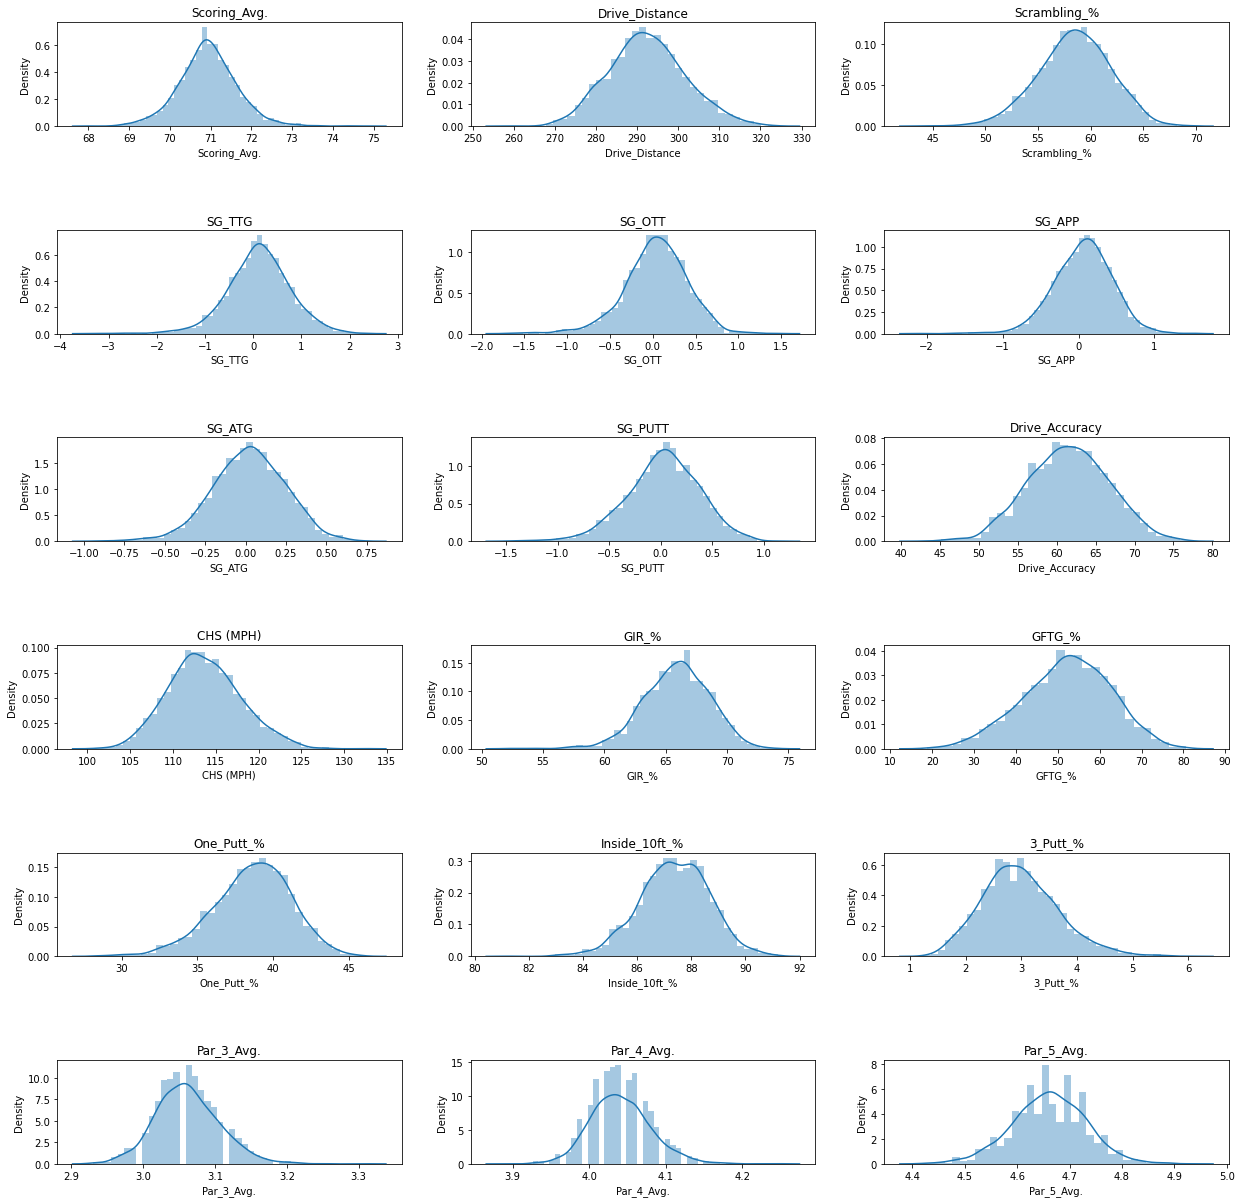

In [4]:
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(21,21))

# Selecting columns we want distributions for 
hist_cols = ['Scoring_Avg.', 'Drive_Distance', 'Scrambling_%', 'SG_TTG', 'SG_OTT',
       'SG_APP', 'SG_ATG', 'SG_PUTT', 'Drive_Accuracy', 'CHS (MPH)', 'GIR_%', 'GFTG_%', 'One_Putt_%',
       'Inside_10ft_%', '3_Putt_%', 'Par_3_Avg.',
       'Par_4_Avg.', 'Par_5_Avg.']
row = 0
col = 0

for i, column in enumerate(hist_cols):
    graph = sns.distplot(df[column], ax=ax[row][col])
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

My target variable for my model will be scoring average, so these scatter plots show the relationship each variable has with scoring average. Depending on the variable, a positive or a negative relationship can mean good things. Based off of my first glance, it seems that `Strokes Gained: Tee To Green` has the strongest effect on scoring average.

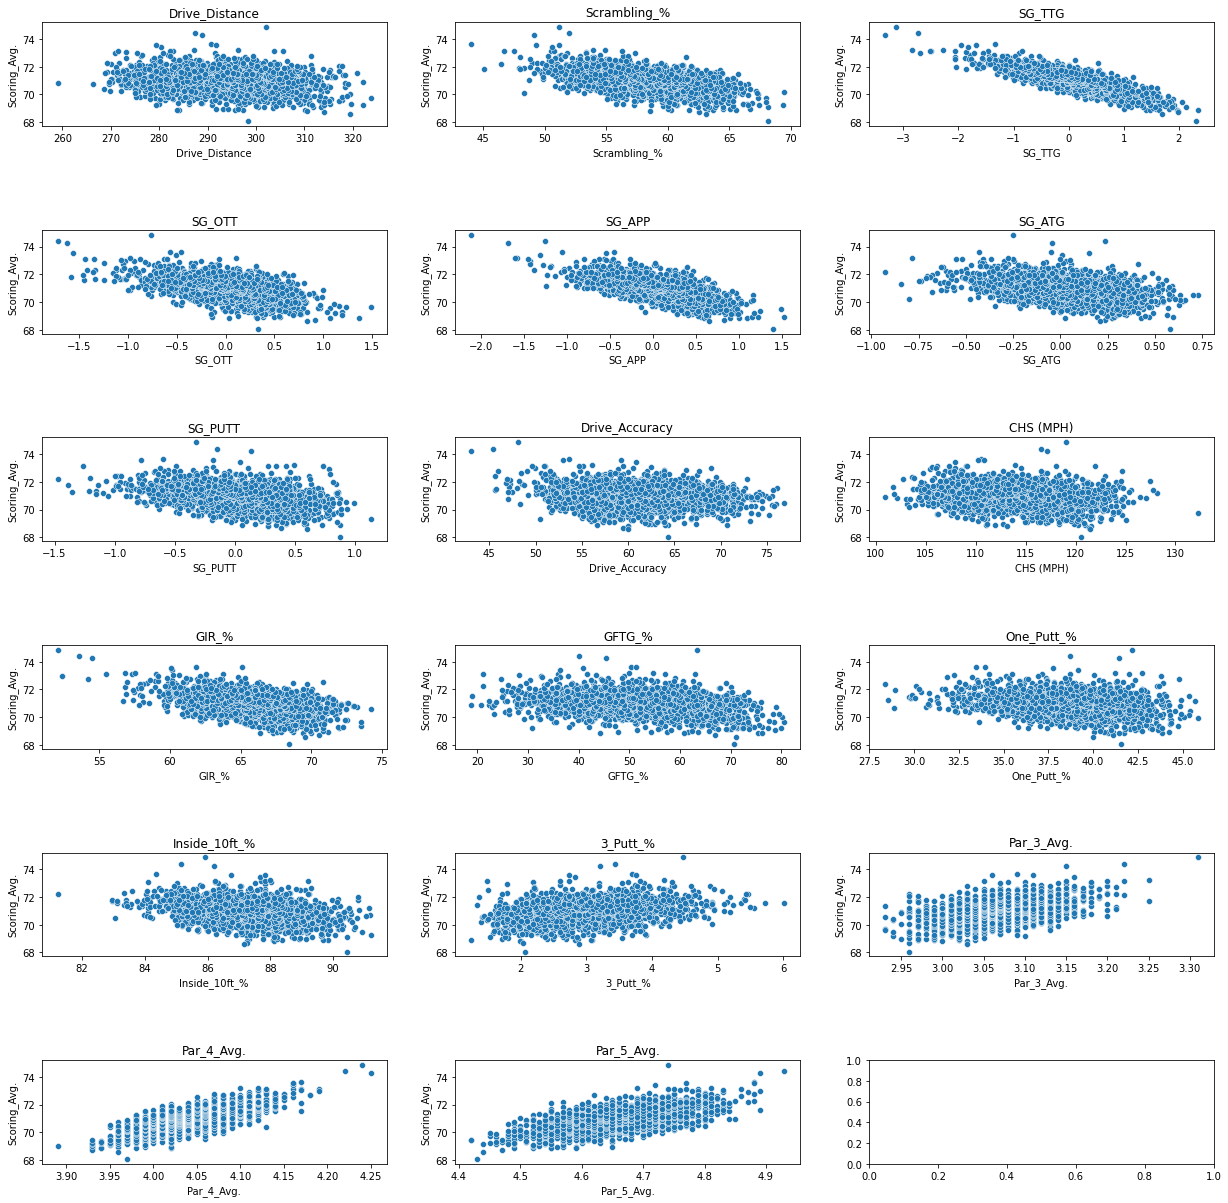

In [5]:
f, ax = plt.subplots(nrows = 6, ncols = 3, figsize=(21,21))
dist_cols = ['Drive_Distance', 'Scrambling_%', 'SG_TTG', 'SG_OTT',
       'SG_APP', 'SG_ATG', 'SG_PUTT', 'Drive_Accuracy', 'CHS (MPH)', 'GIR_%', 'GFTG_%', 'One_Putt_%',
       'Inside_10ft_%', '3_Putt_%', 'Par_3_Avg.',
       'Par_4_Avg.', 'Par_5_Avg.']
row = 0
col = 0
for i, column in enumerate(dist_cols):
    graph = sns.scatterplot(x=column, y="Scoring_Avg.", data=df, ax=ax[row][col]);
    graph.set(title = column)
    col += 1
    if col == 3:
        col = 0
        row += 1
        
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)

Setting these relationships into numeric values, I get a much better understanding of which values affect scoring average the most.

In [6]:
df.corr()['Scoring_Avg.'].abs().sort_values(ascending=False)

Scoring_Avg.      1.000000
Unnamed: 0        0.951151
SG_TTG            0.841588
Par_4_Avg.        0.757317
SG_APP            0.677591
Par_5_Avg.        0.603245
SG_OTT            0.538978
Scrambling_%      0.519489
GIR_%             0.470815
Par_3_Avg.        0.444569
SG_ATG            0.396201
SG_PUTT           0.376623
Inside_10ft_%     0.327321
GFTG_%            0.299535
ROUNDS            0.298462
3_Putt_%          0.297204
One_Putt_%        0.256447
Drive_Distance    0.235377
CHS (MPH)         0.196914
Drive_Accuracy    0.185860
Year              0.029310
Name: Scoring_Avg., dtype: float64

In [7]:
df.sort_values(by='Scoring_Avg.', ascending=True)[['PLAYER NAME', 'Year', 'Scoring_Avg.']][:10]

,PLAYER NAME,Year,Scoring_Avg.
0,Tiger Woods,2009,68.052
2439,Rory McIlroy,2022,68.595
1669,Dustin Johnson,2018,68.698
933,Rory McIlroy,2014,68.827
1479,Jordan Spieth,2017,68.846
376,Luke Donald,2011,68.861
562,Rory McIlroy,2012,68.873
753,Steve Stricker,2013,68.893
563,Tiger Woods,2012,68.904
1110,Jordan Spieth,2015,68.938


In [8]:
# features are the predictors or independent variables
scoring_features = df[['SG_PUTT', 'SG_ATG', 'SG_APP', 'SG_OTT']]

# the outcome is the result or the dependent variables 
scoring_outcome = df['Scoring_Avg.']

# fit (build) the model using the features and the outcome
scoringregression = LinearRegression().fit(scoring_features, scoring_outcome)

# the intercept is where the linear model will cross the y-axis (the expected
# value of y when x is zero)
print('The intercept for the regression model is: ', scoringregression.intercept_.round(2))

print('The coefficients for the features are:')
for x, y in zip(scoring_features.columns, scoringregression.coef_):
  print('\t', x, ':', y.round(2))

The intercept for the regression model is:  71.08
The coefficients for the features are:
	 SG_PUTT : -0.94
	 SG_ATG : -0.94
	 SG_APP : -0.97
	 SG_OTT : -0.96


In [9]:
# R-squared is one measurment of the amount of variance in the outcome that is
# accounted for by the model
print("This model's r-squared is:", scoringregression.score(scoring_features, scoring_outcome))

This model's r-squared is: 0.9219016455349678


In [10]:
X_train, X_test, y_train, y_test1 = train_test_split(scoring_features, scoring_outcome, test_size=0.2, random_state=0)
scoring_training_regression = LinearRegression().fit(X_train, y_train)

y_pred1 = scoring_training_regression.predict(X_test)

scoring_regression_test = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
scoring_regression_test.head()

,Actual,Predicted
2317,70.911,70.695470
1708,70.320,70.291975
1674,69.342,69.544033
1332,70.523,70.487430
2572,71.222,71.399132


In [11]:
# R-squared is one measurment of the amount of variance in the outcome that is
# accounted for by the model
print("This model's r-squared is:", scoring_training_regression.score(scoring_features, scoring_outcome))

This model's r-squared is: 0.9218685062041317


In [12]:
# Instantiate and fit a vanilla (all default arguments) decision tree
dt = DecisionTreeRegressor()
scoringregression_dt = dt.fit(scoring_features, scoring_outcome)

In [13]:
print("This model's r-squared is:", scoringregression_dt.score(scoring_features, scoring_outcome).round(2))

This model's r-squared is: 1.0


In [14]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(scoring_features, scoring_outcome)

RandomForestRegressor(n_estimators=10, random_state=0)

In [15]:
r2_score(y_test1,y_pred1)

0.919461856232632

In [16]:
# Create model featuring Strokes Gained: Putting, Strokes Gained: Around the Green, 
# Strokes Gained: Approach, and Strokes Gained: Off the Tee in relation with scoring.
def scoring_model(sg_putt, sg_atg, sg_app, sg_ott):
  prediction = -0.94 * sg_putt + -0.94 * sg_atg + sg_app * -0.97 + sg_ott * -0.96 + 71.08
  return prediction

# Change each features to show effect on scoring average
print("Baseline: ", scoring_model(0,0,0,0))
print("1.0 SG_Putting: ", scoring_model(1,0,0,0))
print("1.0 SG_Around_the_Green", scoring_model(0,1,0,0))
print("1.0 SG_Approach", scoring_model(0,0,1,0))
print("1.0 SG_Off_the_Tee", scoring_model(0,0,0,1))

Baseline:  71.08
1.0 SG_Putting:  70.14
1.0 SG_Around_the_Green 70.14
1.0 SG_Approach 70.11
1.0 SG_Off_the_Tee 70.12


In [17]:
# features are the predictors or independent variables
scoring_features2 = df[['Drive_Distance', 'Scrambling_%', 'GIR_%', 'GFTG_%', 'Inside_10ft_%']]

# the outcome is the result or the dependent variables 
scoring_outcome = df['Scoring_Avg.']

# fit (build) the model using the features and the outcome
scoringregression = LinearRegression().fit(scoring_features2, scoring_outcome)

# the intercept is where the linear model will cross the y-axis (the expected
# value of y when x is zero)
print('The intercept for the regression model is: ', scoringregression.intercept_.round(2))

print('The coefficients for the features are:')
for x, y in zip(scoring_features2.columns, scoringregression.coef_):
  print('\t', x, ':', y.round(2))

The intercept for the regression model is:  90.88
The coefficients for the features are:
	 Drive_Distance : -0.0
	 Scrambling_% : -0.09
	 GIR_% : -0.09
	 GFTG_% : -0.02
	 Inside_10ft_% : -0.08


In [18]:
# R-squared is one measurment of the amount of variance in the outcome that is
# accounted for by the model
print("This model's r-squared is:", scoringregression.score(scoring_features2, scoring_outcome).round(2))

This model's r-squared is: 0.53


In [19]:
X_train, X_test, y_train, y_test = train_test_split(scoring_features2, scoring_outcome, test_size=0.2, random_state=0)
scoring_training_regression = LinearRegression().fit(X_train, y_train)

y_pred = scoring_training_regression.predict(X_test)

scoring_regression_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
scoring_regression_test.head()

,Actual,Predicted
2317,70.911,70.564796
1708,70.320,70.481849
1674,69.342,70.468130
1332,70.523,71.066047
2572,71.222,71.287819


In [20]:
# Create model featuring Driving Distance, Scrambling Percentage, 
# Greens In Regulation Percentage, Going For The Green, Putting - Inside 10'.
def scoring_model2(driving_distance, scrambling, gir, gftg, p_inside10):
  prediction2 = -0.0 * driving_distance + -0.09 * scrambling + gir * -0.09 + gftg * -0.02 + p_inside10 * -0.08 + 90.88
  return prediction2

# Change each features to show effect on scoring average
print("Baseline: ", scoring_model2(0,0,0,0,0))
print("1.0 Drive_Distance: ", scoring_model2(1,0,0,0,0))
print("1.0 Scrambling_%", scoring_model2(0,1,0,0,0))
print("1.0 GIR_%", scoring_model2(0,0,1,0,0))
print("1.0 GFTG_%", scoring_model2(0,0,0,1,0))
print("1.0 Inside_10ft_%", scoring_model2(0,0,0,0,1))

Baseline:  90.88
1.0 Drive_Distance:  90.88
1.0 Scrambling_% 90.78999999999999
1.0 GIR_% 90.78999999999999
1.0 GFTG_% 90.86
1.0 Inside_10ft_% 90.8


In [21]:
df.corr()['Scoring_Avg.'].abs().sort_values(ascending=False)

Scoring_Avg.      1.000000
Unnamed: 0        0.951151
SG_TTG            0.841588
Par_4_Avg.        0.757317
SG_APP            0.677591
Par_5_Avg.        0.603245
SG_OTT            0.538978
Scrambling_%      0.519489
GIR_%             0.470815
Par_3_Avg.        0.444569
SG_ATG            0.396201
SG_PUTT           0.376623
Inside_10ft_%     0.327321
GFTG_%            0.299535
ROUNDS            0.298462
3_Putt_%          0.297204
One_Putt_%        0.256447
Drive_Distance    0.235377
CHS (MPH)         0.196914
Drive_Accuracy    0.185860
Year              0.029310
Name: Scoring_Avg., dtype: float64

In [22]:
df_recent = df.loc[df_total['Year'] == '2022']

NameError: name 'df_total' is not defined

In [ ]:
df_recent.corr()['Scoring_Avg.'].abs().sort_values(ascending=False)